In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import pandas_ta as ta
import yfinance as yf

%matplotlib inline

In [3]:

#import Data

data = yf.Ticker('IAM.PA').history(start='2020-01-02', end='2021-11-02')[['Close']]


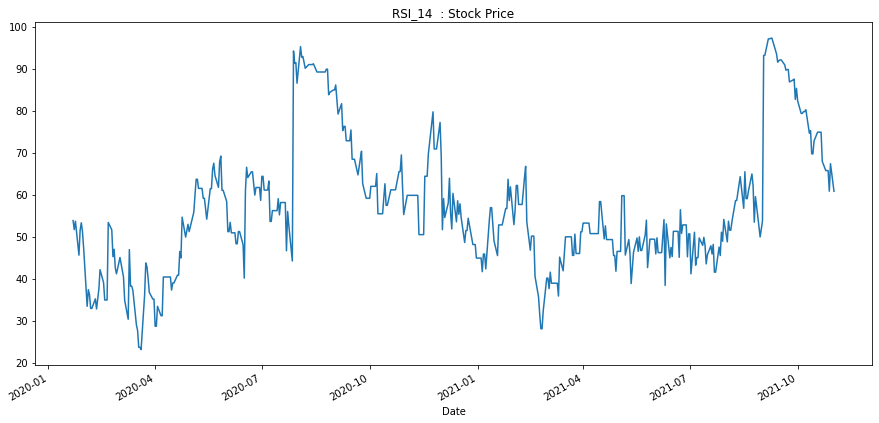

In [4]:

def rsi_14( data : pd.DataFrame ): 
    """" 
    This function compute the steps to calculate the RSI Indicator :
    Step 1 : Calculate diffrence in price between the given period 
    Step 2 : Calculate the gain and loss for each day in the given period 
    Step 3 : Compute the average gain/loss 
    Step 4 : Calculate the RS value 
    Step 5 : The RSI value 

    """
    
    
#compute the diffrences between the rows
    data['diff'] = data.diff(1)
#plus-moins value
    data['plus-value'] = data['diff'].clip(lower=0).round(2)
    data['perte'] = data['diff'].clip(upper=0).abs().round(2)
# plus-value moins-value moyennes, periode de 14 jours 
#pour la premiere periode
    data['moy_plus_value'] = data['plus-value'].rolling(window=14, min_periods=14).mean()[:15]
    data['moy_moins_value'] = data['perte'].rolling(window=14, min_periods=14).mean()[:15]

#plus-value moins-value moyennes 
#plus_value moyenne
    for i, row in enumerate(data['moy_plus_value'].iloc[15:]):
        data['moy_plus_value'].iloc[i + 15] =\
            (data['moy_plus_value'].iloc[i + 14] * (13) + data['plus-value'].iloc[i + 15])\
            / 14

# moins-value moyenne 
    for i, row in enumerate(data['moy_moins_value'].iloc[15:]):
        data['moy_moins_value'].iloc[i + 15] =\
    (data['moy_moins_value'].iloc[i + 14] *(13) + data['perte'].iloc[i + 15])\
            / 14

    #la valeur RS 
    data['RS_value'] = data['moy_plus_value'] / data['moy_moins_value']
    # rsi = 100 - (100 / (1.0 + RS))
    data["RSI_14"] = 100 - (100 / (1.0 + data['RS_value']))
    data.RSI_14.plot( label = 'RSI_14', title ="RSI_14  : Stock Price", figsize = (15,7))


    return pd.DataFrame(data)

desc_RS14 = rsi_14 (data)



In [ ]:
print(desc_RS14.tail())
